# Turbulent Kinetic Energy
Calculate kinetic energy in turbulence based on turbulence intensity. Turbulence intensity is defined as the ratio between the standard deviation of the deviation from the mean noramlised against the 

## Setup

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [2]:
# initialise variables
TI, WS_Eff = sy.symbols(
    ["TI", "WS_Eff"], positive=True
)  # turbulence intensity and effective wind speed as defiend in pywake
x, sigma, mu = sy.symbols(
    ["x", "sigma", "mu"], positive=True
)  # speed, standard deviation and mean
y = sy.symbols("y", real=True)  # deviation from mean

## Normal distribution

In [3]:
# normal distribution probablity distribution function
pdf = 1 / (sigma * sy.sqrt(2 * sy.pi)) * sy.E ** (-1 / 2 * ((x - mu) / sigma) ** 2)
pdf = pdf.subs(x - mu, y)
pdf

sqrt(2)*exp(-0.5*y**2/sigma**2)/(2*sqrt(pi)*sigma)

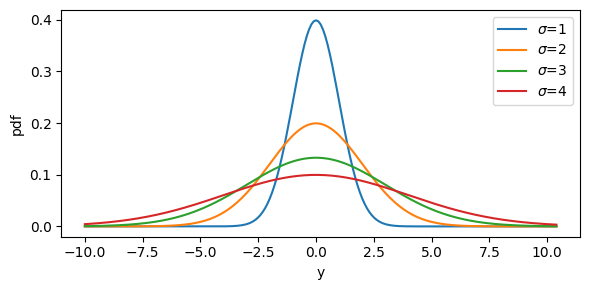

In [4]:
# visualise pdf
pdf_fun = sy.lambdify(args=[y, sigma], expr=pdf)
fig, ax = plt.subplots(figsize=(6, 3))
y_ = np.arange(-10, 10.5, 0.1)
for sigma_ in range(1, 5):
    ax.plot(y_, pdf_fun(y=y_, sigma=sigma_), label=rf"$\sigma$={sigma_}")
ax.set_xlabel("y")
ax.set_ylabel("pdf")
ax.legend()
fig.tight_layout()

In [5]:
# check integration of pdf
assert np.isclose(float(sy.integrate(pdf, (y, -sy.oo, sy.oo)).evalf()), 1)

## Mean square of deviation

In [6]:
sy.integrate(pdf * y**2, (y, -sy.oo, sy.oo)).evalf()

1.0*sigma**2